In [526]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
uploaded = files.upload()
import io

data_org = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (5).csv


## Data Preprocessing

In [527]:
data = data_org.copy()

In [528]:
data.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc,Final
0,1,2018,11,7,1,2,2,2,53,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,2,2018,1,7,1,2,2,1,17,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,2018,5,7,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,4,2018,1,7,1,2,2,1,21,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,5,2016,8,7,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [529]:
# Percentage of na values in columns
data.isna().mean()*100

ID                                              0.000000
Year                                            0.000000
Month                                           0.000000
Hospital                                        0.000000
Sample                                          0.000000
                                                 ...    
FU_L.interrogansserovarAustralisstr.Ballico    91.204037
FU_L.interrogansserovarwolfiistr.3705          91.204037
FU_L.interrogansserovarWeerasinghe             91.204037
FU_Patoc                                       91.204037
Final                                           0.000000
Length: 806, dtype: float64

In [530]:
# Renaming some columns
col_names = {'Muscletendernessonset': 'Mustenderonset', 
             'Muscletendernessad':'Mustenderad','Vomitingadmission':'Vomitingad',
             'Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 
             'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 
             'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset',
             'Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
data.rename(columns = col_names, inplace=True)

In [531]:
# There are more than 10 columns for each variable below. Those data will be summarized by taking the number of days the patient had the particular symptom.
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = data[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [532]:
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
data.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = data[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  data[col+'Days'] = df['Days']
  data.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [533]:
# Columns having more than 70% of missing values will be deleted.
missing_percentage = data.isna().mean() * 100
columns_to_drop_1 = missing_percentage[missing_percentage > 70].index
data = data.drop(columns_to_drop_1, axis=1)

In [534]:
drop_cols = ['PRad','SBPadd','DBPadd','Pulserate2','Pulserate3','Pulserate4',
             'Pulserate5','Pulserate6','Pulserate7','Pulserate8','Pulserate9',
             'Pulserate10','SBP2','DBP2','SBP3','DBP3','SBP4','DBP4','SBP5',
             'DBP5','SBP6','DBP6','SBP7','DBP7','SBP8','DBP8','SBP9','DBP9',
             'SBP10','DBP10']
# Cannot distinguish between actual 99 values and na 99 values
data.drop(drop_cols, axis=1, inplace=True)

To summarize the data for the platelet, WBC, RBC, neutrophils, and other variables measured for ten days according to the number of days the patient had low, normal, and high counts based on clinical standards, I have followed these steps:

1.   Define the cutoff values for low, normal, and high counts for each variable based on clinical standards.
2.   Create new columns in the dataset to represent the summarized counts for each variable.(I have used labels such as "low_count", "normal_count", and "high_count".)
3.   Iterate through the ten days of measurements for each variable and determine the count of days that fall into the low, normal, and high categories according to the cutoff values. Update the corresponding columns in the dataset accordingly.


**Platelet count levels**

*   Normal - [150 000, 450 000]
*   Mild thrombocytopenia - [101 000, 140 000]
*   Moderate thrombocytopenia - [51 000, 100 000]
*   Severe thrombocytopenia - [21 000, 51 000]

No of days with platelet counts for each levels will be recorded.


In [535]:
col = 'Platelet'
colnames = [col + 'count', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
platelet = data[colnames]
platelet = platelet.replace(99, np.nan)

def normal_plat(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(150000 <= val <= 450000 for val in row if not pd.isna(val))
        return count

def mildlow_plat(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(101000 <= val < 150000 for val in row if not pd.isna(val))
        return count

def moderatelow_plat(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(51000 <= val < 101000 for val in row if not pd.isna(val))
        return count

def severelow_plat(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 51000 for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_platelet = platelet.apply(normal_plat, axis=1)
mildlow_platelet = platelet.apply(mildlow_plat, axis=1)
moderatelow_platelet = platelet.apply(moderatelow_plat, axis=1)
severelow_platelet = platelet.apply(severelow_plat, axis=1)

data['normal_platelet'] = normal_platelet
data['mildlow_platelet'] = mildlow_platelet
data['moderatelow_platelet'] = moderatelow_platelet
data['severelow_platelet'] = severelow_platelet

data.drop(colnames, axis = 1, inplace = True)


**WBC Count**

*   Normal - [4 000, 11 000]
*   Low - < 4000
*   High - >11 000







In [536]:
col = 'WBCcount'
colnames = ['WBCcount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
wbc = data[colnames]
wbc = wbc.replace(99, np.nan)


def normal_wbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(4000 <= val <= 11000 for val in row if not pd.isna(val))
        return count

def low_wbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 4000 for val in row if not pd.isna(val))
        return count

def high_wbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(11000 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_wbcc = wbc.apply(normal_wbc, axis=1)
low_wbcc = wbc.apply(low_wbc, axis=1)
high_wbcc = wbc.apply(high_wbc, axis=1)


data['normal_wbc'] = normal_wbcc
data['low_wbc'] = low_wbcc
data['high_wbc'] = high_wbcc


data.drop(colnames, axis = 1, inplace = True)

**Neutrophils**

*   Normal - [2500, 7000]
*   Low - < 2500
*   High - > 7000






In [537]:
col = 'Ncount'
colnames = ['Ncount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Nc = data[colnames]
Nc = Nc.replace(99, np.nan)


def normal_Nc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(2500 <= val <= 7000 for val in row if not pd.isna(val))
        return count

def low_Nc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 2500 for val in row if not pd.isna(val))
        return count

def high_Nc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(7000 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_NC = Nc.apply(normal_Nc, axis=1)
low_NC = Nc.apply(low_Nc, axis=1)
high_NC = Nc.apply(high_Nc, axis=1)


data['normal_Nc'] = normal_NC
data['low_Nc'] = low_NC
data['high_Nc'] = high_NC


data.drop(colnames, axis = 1, inplace = True)

**Lymphocytes**

*   Normal - [1000,4800]
*   Low - < 1000
*   High - > 4800






In [538]:
col = 'Lcount'
colnames = ['Lcount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Lc = data[colnames]
Lc = Lc.replace(99, np.nan)


def normal_Lc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(1000 <= val <= 4800 for val in row if not pd.isna(val))
        return count

def low_Lc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 1000 for val in row if not pd.isna(val))
        return count

def high_Lc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(4800 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_LC = Lc.apply(normal_Lc, axis=1)
low_LC = Lc.apply(low_Lc, axis=1)
high_LC = Lc.apply(high_Lc, axis=1)


data['normal_Lc'] = normal_LC
data['low_Lc'] = low_LC
data['high_Lc'] = high_LC

data.drop(colnames, axis = 1, inplace = True)

**Red Blood Count (RBC)**

*   Normal - [4.2M, 6.1M]



In [539]:
col = 'RBC'
colnames = ['RBC', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
rbc = data[colnames]
rbc = rbc.replace(99, np.nan)


def normal_rbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(4200000 <= val <= 6100000 for val in row if not pd.isna(val))
        return count

def low_rbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 4200000 for val in row if not pd.isna(val))
        return count

def high_rbc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(6100000 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_rbcc = rbc.apply(normal_rbc, axis=1)
low_rbcc = rbc.apply(low_rbc, axis=1)
high_rbcc = rbc.apply(high_rbc, axis=1)


data['normal_rbc'] = normal_rbcc
data['low_rbc'] = low_rbcc
data['high_rbc'] = high_rbcc

data.drop(colnames, axis = 1, inplace = True)

In [540]:
# Pus cells doesn't indicate any unsual case and there are na values for more than approximately 1000 cases. Hence those columns will be dropped.
col = 'Puscells'
colnames = ['Puscells', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data.drop(colnames, axis = 1, inplace = True)

In [541]:
drop_cols = ['PulseRate','PulseRhythem','WBC_first_day','WBCCount1','ALP', 'Sphosphate', 'Samylase']
# Cannot distinguish between actual 99 values and na 99 values
data.drop(drop_cols, axis=1, inplace=True)

**Red Cells**

*   Normal is 4




In [542]:
col = 'Redcells'
colnames = ['Redcells', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
rc = data[colnames]

# Loop through each column
for col in colnames:
    # Replace string values with NaN
    rc[col] = pd.to_numeric(rc[col], errors='coerce')
    # Convert the column to the integer type
    rc[col] = rc[col].astype('Int64')

rc = rc.replace(99, np.nan)


In [543]:
def normal_rc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val == 4 for val in row if not pd.isna(val))
        return count

def low_rc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 4 for val in row if not pd.isna(val))
        return count

def high_rc(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(4 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_rcc = rc.apply(normal_rc, axis=1)
low_rcc = rc.apply(low_rc, axis=1)
high_rcc = rc.apply(high_rc, axis=1)


data['normal_rc'] = normal_rcc
data['low_rc'] = low_rcc
data['high_rc'] = high_rcc

data.drop(colnames, axis = 1, inplace = True)

**Neutrophils percentage**

*   Normal - 40% t0 60%




In [544]:
col = 'N'
colnames = ['N', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Np = data[colnames]
Np = Np.replace(99, np.nan)


def normal_Np(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(40 <= val <= 60 for val in row if not pd.isna(val))
        return count

def low_Np(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 40 for val in row if not pd.isna(val))
        return count

def high_Np(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(60 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_NP = Np.apply(normal_Np, axis=1)
low_NP = Np.apply(low_Np, axis=1)
high_NP = Np.apply(high_Np, axis=1)


data['normal_Np'] = normal_NP
data['low_Np'] = low_NP
data['high_Np'] = high_NP

data.drop(colnames, axis = 1, inplace = True)

**Lymphocytes percentage**

*   Normal - 20% to 40%




In [545]:
col = 'L'
colnames = ['L', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Lp = data[colnames]
Lp = Lp.replace(99, np.nan)


def normal_Lp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(20 <= val <= 40 for val in row if not pd.isna(val))
        return count

def low_Lp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 20 for val in row if not pd.isna(val))
        return count

def high_Lp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(40 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_LP = Lp.apply(normal_Lp, axis=1)
low_LP = Lp.apply(low_Lp, axis=1)
high_LP = Lp.apply(high_Lp, axis=1)


data['normal_Lp'] = normal_LP
data['low_Lp'] = low_LP
data['high_Lp'] = high_LP

data.drop(colnames, axis = 1, inplace = True)

**PCV**

*   Normal - 35.5% to 48.6%




In [546]:
col = 'PCV'
colnames = ['PCV', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
pcv = data[colnames]
pcv = pcv.replace(99, np.nan)


def normal_pcv(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(35.5 <= val <= 48.6 for val in row if not pd.isna(val))
        return count

def low_pcv(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 35.5 for val in row if not pd.isna(val))
        return count

def high_pcv(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(48.6 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_pcvp = pcv.apply(normal_pcv, axis=1)
low_pcvp = pcv.apply(low_pcv, axis=1)
high_pcvp = pcv.apply(high_pcv, axis=1)


data['normal_pcv'] = normal_pcvp
data['low_pcv'] = low_pcvp
data['high_pcv'] = high_pcvp

data.drop(colnames, axis = 1, inplace = True)

**CRP**


*   Normal - < 0.9
*   Moderate elevation - 1  to 10(mg/dL)
*   Marked elevation - > 10
*   Severe elevation - > 50





In [547]:
col = 'CRP'
colnames = ['CRP', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
crp = data[colnames]
crp = crp.replace(99, np.nan)


def normal_crp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(0.9 <= val for val in row if not pd.isna(val))
        return count

def moderate_crp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(0.9 < val <= 10 for val in row if not pd.isna(val))
        return count

def marked_crp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(10 < val <= 50 for val in row if not pd.isna(val))
        return count

def severe_crp(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(50 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_crpp = crp.apply(normal_crp, axis=1)
moderate_crpp = crp.apply(moderate_crp, axis=1)
marked_crpp = crp.apply(marked_crp, axis=1)
severe_crpp = crp.apply(severe_crp, axis=1)

data['normal_crp'] = normal_crpp
data['moderate_crp'] = moderate_crpp
data['marked_crp'] = marked_crpp
data['severe_crp'] = severe_crpp

data.drop(colnames, axis = 1, inplace = True)

**Albumin**

*   nil - 0
*   trace/occ - 1
*   +/++/+++ - 2






In [548]:
col = 'Albumin'
colnames = ['Albumin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
alb = data[colnames]
alb = alb.replace(99, np.nan)


def nill_alb(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val == 0 for val in row if not pd.isna(val))
        return count

def occ_alb(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val == 1 for val in row if not pd.isna(val))
        return count

def plus_alb(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val == 2 for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
nill_albc = alb.apply(nill_alb, axis=1)
occ_albc = alb.apply(occ_alb, axis=1)
plus_albc = alb.apply(plus_alb, axis=1)


data['nill_alb'] = nill_albc
data['occ_alb'] = occ_albc
data['plus_alb'] = plus_albc

data.drop(colnames, axis = 1, inplace = True)

**Na**

*   Normal - 135 to 145(mEq/L)



In [549]:
col = 'Na'
colnames = ['Na', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Na = data[colnames]
Na = Na.replace(99, np.nan)


def normal_Na(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(135 <= val <= 145 for val in row if not pd.isna(val))
        return count

def low_Na(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 135 for val in row if not pd.isna(val))
        return count

def high_Na(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(145 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_Nap = Na.apply(normal_Na, axis=1)
low_Nap = Na.apply(low_Na, axis=1)
high_Nap = Na.apply(high_Na, axis=1)


data['normal_Na'] = normal_Nap
data['low_Na'] = low_Nap
data['high_Na'] = high_Nap

data.drop(colnames, axis = 1, inplace = True)

In [550]:
col = 'K'
colnames = ['K', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
K = data[colnames]
K = K.replace(99, np.nan)


def normal_K(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(3.6 <= val <= 5.2 for val in row if not pd.isna(val))
        return count

def low_K(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 3.6 for val in row if not pd.isna(val))
        return count

def high_K(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(5.2 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_Kp = K.apply(normal_K, axis=1)
low_Kp = K.apply(low_K, axis=1)
high_Kp = K.apply(high_K, axis=1)


data['normal_K'] = normal_Kp
data['low_K'] = low_Kp
data['high_K'] = high_Kp

data.drop(colnames, axis = 1, inplace = True)

In [551]:
col = 'AST'
colnames = ['AST', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
AST = data[colnames]
AST = AST.replace(99, np.nan)


def normal_AST(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(8 <= val <= 33 for val in row if not pd.isna(val))
        return count

def low_AST(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 8 for val in row if not pd.isna(val))
        return count

def high_AST(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(33 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_ASTp = AST.apply(normal_AST, axis=1)
low_ASTp = AST.apply(low_AST, axis=1)
high_ASTp = AST.apply(high_AST, axis=1)


data['normal_AST'] = normal_ASTp
data['low_AST'] = low_ASTp
data['high_AST'] = high_ASTp

data.drop(colnames, axis = 1, inplace = True)

In [552]:
col = 'T.Bilirub'
colnames = ['T.Bilirubin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
TBil = data[colnames]
TBil = TBil.replace(99, np.nan)


def normal_TBil(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val <= 1.2 for val in row if not pd.isna(val))
        return count

def high_TBil(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(1.2 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_TBilp = TBil.apply(normal_TBil, axis=1)
high_TBilp = TBil.apply(high_TBil, axis=1)


data['normal_TBil'] = normal_TBilp
data['high_TBil'] = high_TBilp

data.drop(colnames, axis = 1, inplace = True)

In [553]:
col = 'D.Bilirub'
colnames = ['D.Bilirubin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
DBil = data[colnames]
DBil = DBil.replace(99, np.nan)


def normal_DBil(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val <= 5.2 for val in row if not pd.isna(val))
        return count

def high_DBil(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(5.2 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_DBilp = DBil.apply(normal_DBil, axis=1)
high_DBilp = DBil.apply(high_DBil, axis=1)


data['normal_DBil'] = normal_DBilp
data['high_DBil'] = high_DBilp

data.drop(colnames, axis = 1, inplace = True)

In [554]:
col = 'B.Urea'
colnames = ['B.urea', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data[colnames] = data[colnames].where(data[colnames] < 99, np.nan)


In [555]:
BUrea = data[colnames]
def normal_BUrea(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(7 <= val <= 20 for val in row if not pd.isna(val))
        return count

def low_BUrea(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(val < 7 for val in row if not pd.isna(val))
        return count

def high_BUrea(row):
    if row.isna().all():
        return np.nan
    else:
        count = sum(20 < val for val in row if not pd.isna(val))
        return count

# Apply the condition functions to each row
normal_BUreap = BUrea.apply(normal_BUrea, axis=1)
low_BUreap = BUrea.apply(low_BUrea, axis=1)
high_BUreap = BUrea.apply(high_BUrea, axis=1)


data['normal_BUrea'] = normal_BUreap
data['low_BUrea'] = low_BUreap
data['high_BUrea'] = high_BUreap

data.drop(colnames, axis = 1, inplace = True)

In [556]:
# ALT can take 99 so it cannot be distinguished between acutal 99 and na
col = 'ALT'
colnames = ['ALT', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data.drop(colnames, axis = 1, inplace = True)

In [557]:
# ESR can take 99 so it cannot be distinguished between acutal 99 and na
col = 'ESR'
colnames = ['ESR', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data.drop(colnames, axis = 1, inplace = True)

In [558]:
# Too many missing values
data.drop(['Granularcast', 'Leucocytes'], axis = 1, inplace = True)

In [559]:
# ESR can take 99 so it cannot be distinguished between acutal 99 and na
col = 'GT'
colnames = ['X.GT', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data.drop(colnames, axis = 1, inplace = True)

# S.Cr
col = 'S.Cr'
colnames = ['S.creatinine', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
data.drop(colnames, axis = 1, inplace = True)

In [560]:
cols = ['S.amylase', 'S.phosphate','ALP']
for col in cols:
  colname = [col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
  data.drop(colname, axis = 1, inplace = True)


In [561]:
data = data.drop('ID', axis=1)
data = data.replace(99, np.nan)
data.isna().sum()

Year               0
Month              0
Hospital           0
Sample             0
ICU               83
                ... 
normal_DBil     1010
high_DBil       1010
normal_BUrea     727
low_BUrea        727
high_BUrea       727
Length: 219, dtype: int64

Variables related to the patient's living or working environment have been recorded. To simplify the representation, a single column was created for each category. If the patient had any encounter in their home, workplace, or neighborhood, the outcome of the variable was recorded as 1.

In [562]:
cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = data[cols]

def water_area(row):
    if row.isnull().all():
        return pd.NA
    elif (row == 1).any():
        return 1
    else:
        return 2

data['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

data.drop(cols, axis = 1, inplace = True)



In [563]:
animal = ['rat', 'cat', 'dog', 'cattle', 'pig', 'goat','other']

lowercase_data = data.copy()
lowercase_data.columns = lowercase_data.columns.str.lower()

for col in animal:
  data[col] = lowercase_data[col + 'home'] + lowercase_data[col + 'workplace'] + lowercase_data[col + 'neighbourhood']
  
data.drop(['Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace',
           'CatNeighbourhood','Doghome','DogWorkplace','DogNeighbourhood',
           'Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome',
           'PigWorkplace','PigNeighbourhood','GoatHome','GoatWorkplace','GoatNeighbourhood','OtherHome',
           'OtherWorkplace','OtherNeighbourhood'], axis = 1, inplace = True)


In [564]:
data = data.rename(columns={'Workplacemarshywet':'Workplacemarshywetland', 'HomeBushes':'Homebushes', 'WorkPlaceworkingpaddyfield':'Workplaceworkingpaddyfield',
                            'workplaceotheragricultural':'Workplaceotheragricultural'})

cols = ['marshywetland','bushes','forest','workingpaddyfield','abondantpaddyfield',
        'otheragricultural','animalfarm','garbageaccumilation','blockeddrainage','sewer']

def outcome(row):
    if row.isnull().all():
        return np.nan
    elif (row == 1).any():
        return 1
    else:
        return 2

for col in cols:
  df = data[['Home' + col, 'Workplace' + col]]
  data['any' + col] = df.apply(outcome, axis=1)
  data.drop(['Home' + col, 'Workplace' + col], axis = 1, inplace = True)

In [565]:
data['urumeeya'] = data['Urumeeyahome'] + data['Urumeeyaworkplace'] + data['UrimeeyaNeighbourhood']
data['otherRhodents'] = data['OtherrhodentsHome'] + data['OtherRhoddentsWorkplace'] + data['OtherRhodentsNeighbourhood']

data.drop(['UrimeeyaNeighbourhood','Urumeeyahome','Urumeeyaworkplace', 'OtherrhodentsHome', 'OtherRhoddentsWorkplace', 'OtherRhodentsNeighbourhood'], axis = 1, inplace=True)

In [566]:
# The number of confirmed test results would be summarized into one column
# Diagnosis
cols = ['WPqPCRDiagnosis','UrineqPCRDiagnosis','CultureqPCRDia','SerumqPCRDiagnosis','UFqPCRDiag']


data['confirmed_diag'] = data[cols].eq(1).sum(axis=1)
data['probable_diag'] = data[cols].eq(2).sum(axis=1)
data['notdetected_diag'] = data[cols].eq(3).sum(axis=1)

data.drop(['UrineqPCRDiagnosis','CultureqPCRDia','SerumqPCRDiagnosis','UFqPCRDiag'], axis = 1, inplace = True)

In [567]:
data['Isolate'] = data['Isolate'].replace(98, np.nan)

In [568]:
missing_percentage = data.isna().mean() * 100
columns_to_drop_2 = missing_percentage[missing_percentage > 50].index
data = data.drop(columns_to_drop_2, axis=1)

In [569]:
cat_columns_to_convert = ['Year','Month','Hospital','Sample','ICU','OPD','Sex',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1','Final']

data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('Int64')
data[cat_columns_to_convert] = data[cat_columns_to_convert].astype('category')

num_columns_to_convert  = data.columns[data.columns.get_loc('HeadacheDays'):]

data[num_columns_to_convert] = data[num_columns_to_convert].astype('Int64')

In [570]:
data.shape

(1387, 82)

In [571]:
null_percentage = data.isnull().sum(axis=1) / data.shape[1]
# Choose rows having less than 50% null data
data2 = data[null_percentage < 0.5]

In [572]:
data2.shape

(1088, 82)

## Imputation

In [573]:
imp_data2 = data2.copy()

categorical_columns = data2.select_dtypes(include='category').columns.tolist()

data2_imputed = imp_data2[categorical_columns].fillna(imp_data2[categorical_columns].mode().iloc[0])

# Update the original dataframe with the imputed values
imp_data2[categorical_columns] = data2_imputed

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'income' column and transform the data
imp_data2['Income'] = imputer.fit_transform(imp_data2[['Income']])

imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the data and transform the 'age' column
imp_data2['Age'] = imputer.fit_transform(imp_data2[['Age']])
# Round the imputed values to the nearest integer
imp_data2['Age'] = imp_data2['Age'].round().astype(int)

columns = imp_data2.columns.tolist()

# Find the index of the 'column_x'
index = columns.index('Final')

missing_columns = columns[index+1:]

data_imputed = imp_data2[missing_columns].fillna(imp_data2[missing_columns].mode().iloc[0])

# Update the original DataFrame with the imputed values
imp_data2[missing_columns] = data_imputed


In [574]:
imp_data2.isnull().any().sum()

0

# Descriptive Analysis

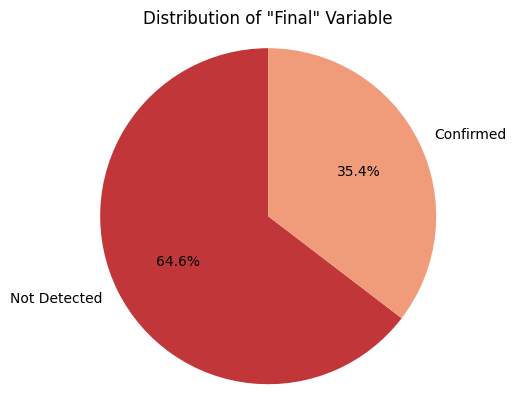

In [575]:
import matplotlib.pyplot as plt
import seaborn as sns
imp_data2['Final'] = imp_data2['Final'].map({1: 'Confirmed', 2: 'Not Detected'})
counts = imp_data2['Final'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
# Set the color palette
sns.set_palette("RdBu")

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of "Final" Variable')

# Display the chart
plt.show()

In the dataset, we can observe that 35.4% of the patients have been diagnosed with leptospirosis.

Year              2016      2017      2018      2019
Final                                               
Confirmed     0.145455  0.451948  0.402597  0.000000
Not Detected  0.298720  0.398293  0.295875  0.007112


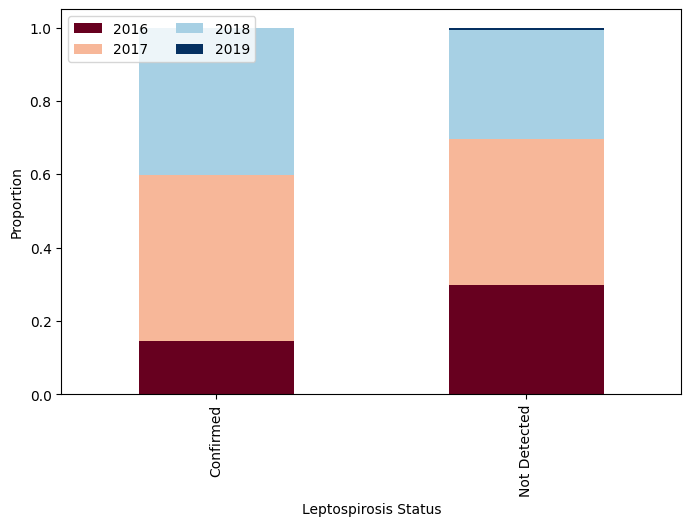

In [576]:
cross_tab_prop = pd.crosstab(index=imp_data2['Final'],
                             columns=imp_data2['Year'],
                             normalize="index")
print(cross_tab_prop)

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='RdBu', 
                    figsize=(8, 5))
        
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Leptospirosis Status")
plt.ylabel("Proportion")
plt.show()

Based on the barplot and cross tabulation, we can see that a significant number of confirmed cases are attributed to the year 2017. Furthermore, the proportions of cases in 2018 and 2017 are relatively similar, indicating a comparable occurrence of confirmed cases during these two years.

Hospital             1         5         7         8
Final                                               
Confirmed     0.025974  0.038961  0.748052  0.187013
Not Detected  0.113798  0.051209  0.665718  0.169275


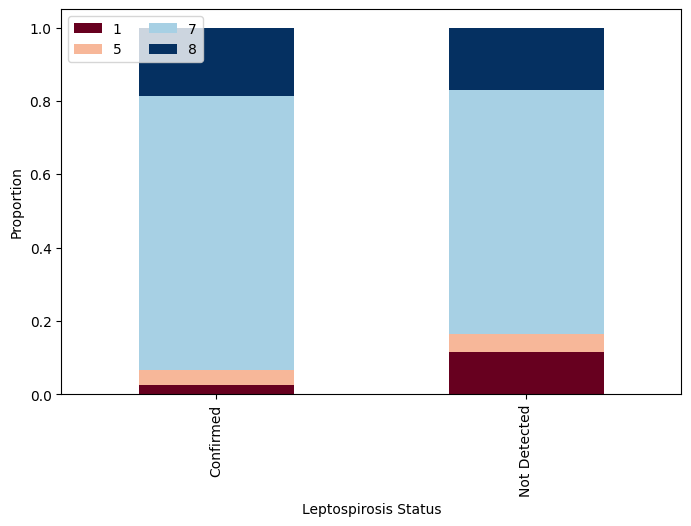

In [577]:
cross_tab_prop = pd.crosstab(index=imp_data2['Final'],
                             columns=imp_data2['Hospital'],
                             normalize="index")
print(cross_tab_prop)

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='RdBu', 
                    figsize=(8, 5))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Leptospirosis Status")
plt.ylabel("Proportion")
plt.show()

The data reveals that the majority of confirmed cases, around 75%, originate from Teaching Hospital Anuradhapura. Factors such as climate, environment, and population density might contribute to the higher incidence of the disease in this region.

WPqPCRDiagnosis  Confirmed  Probable  Not Detected
Final                                             
Confirmed         0.553247  0.067532      0.379221
Not Detected      0.000000  0.172119      0.827881


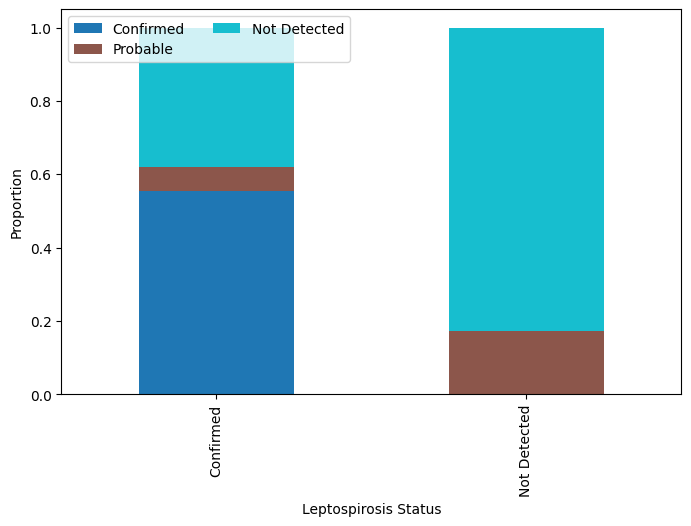

In [578]:
imp_data2['WPqPCRDiagnosis'] = imp_data2['WPqPCRDiagnosis'].map({1: 'Confirmed', 2: 'Probable', 3: 'Not Detected'})
cross_tab_prop = pd.crosstab(index=imp_data2['Final'],
                             columns=imp_data2['WPqPCRDiagnosis'],
                             normalize="index")
print(cross_tab_prop)

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(8, 5))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Leptospirosis Status")
plt.ylabel("Proportion")
plt.show()

Around 55% of the confirmed leptospirosis cases show a positive result for Whole blood qPCR and no positive results for cases which are not detected as leptospirosis. It is a highly effective method for detecting and confirming the presence of Leptospira bacteria in the bloodstream. This indicates that Whole blood qPCR can be used as a diagnostic technique for identifying cases of leptospirosis.

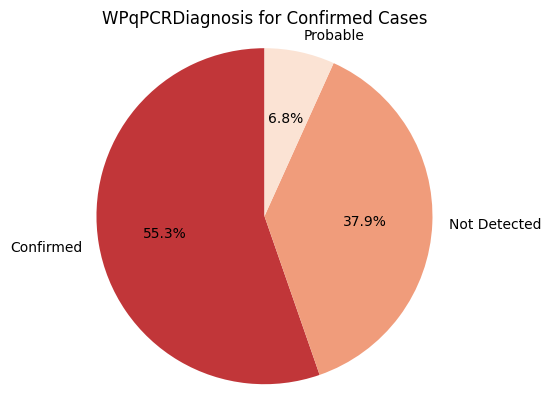

In [579]:
wpqPCR = imp_data2[imp_data2['Final'] == 'Confirmed']
counts = wpqPCR['WPqPCRDiagnosis'].value_counts()
labels = counts.index.tolist()
sizes = counts.values.tolist()
# Set the color palette
sns.set_palette("RdBu")

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('WPqPCRDiagnosis for Confirmed Cases')

# Display the chart
plt.show()

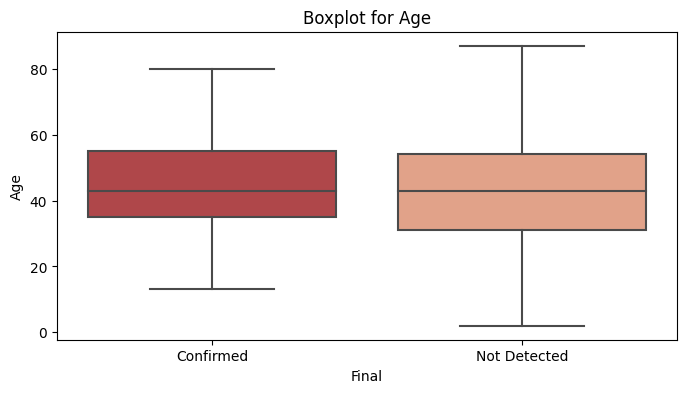

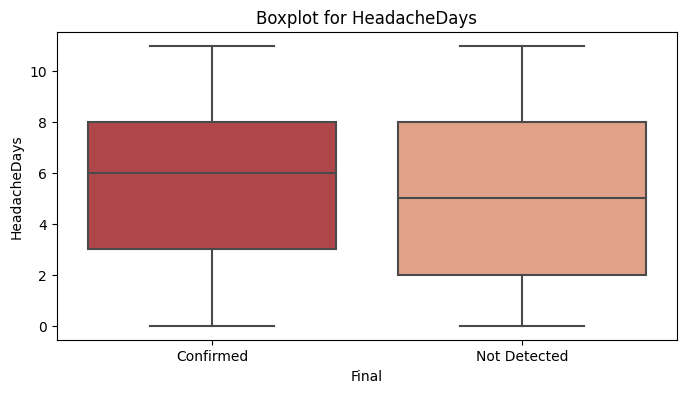

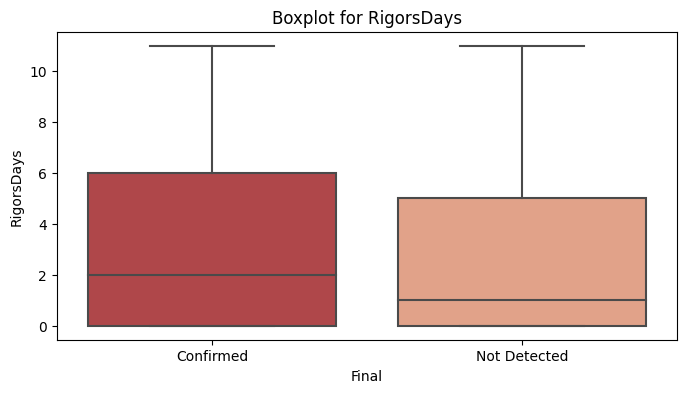

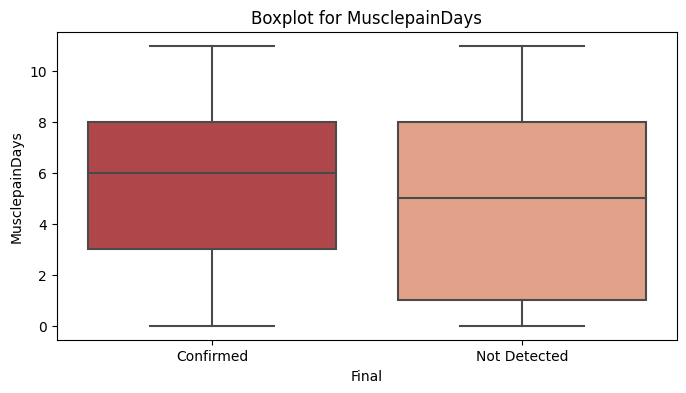

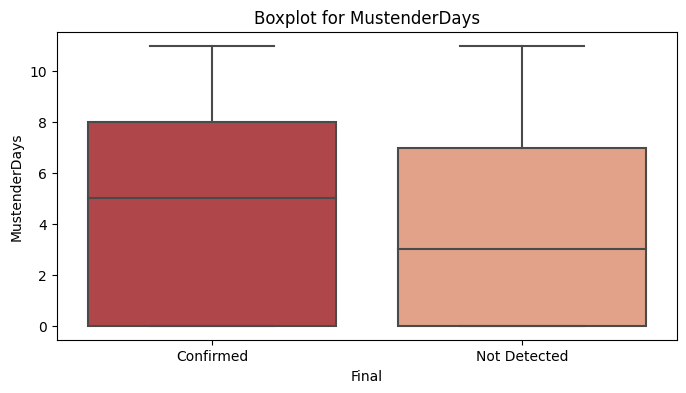

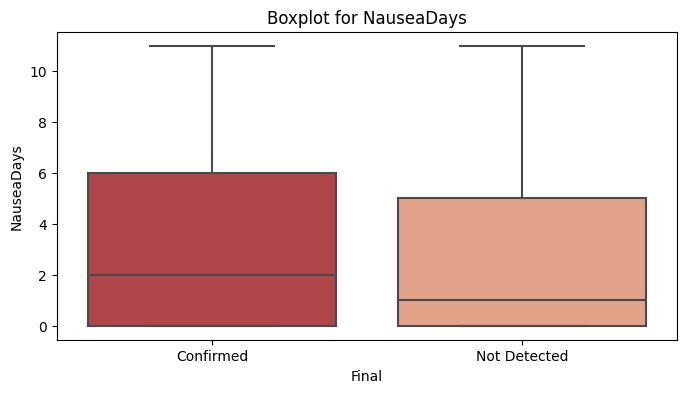

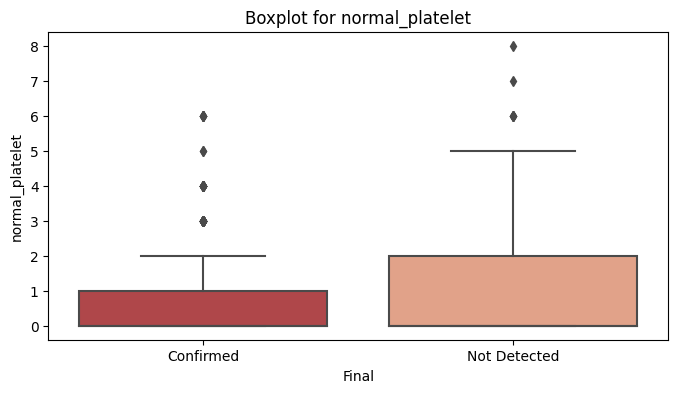

In [580]:
'''variables = imp_data2.columns[imp_data2.columns.get_loc('HeadacheDays'):]

for i, variable in enumerate(variables):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Final', y = variable, data=imp_data2)
    plt.title(f'Boxplot for {variable}')
    plt.show()
'''
variables = ['Age', 'HeadacheDays','RigorsDays', 'MusclepainDays',
 'MustenderDays', 'NauseaDays','normal_platelet']
for i, variable in enumerate(variables):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Final', y = variable, data=imp_data2)
    plt.title(f'Boxplot for {variable}')
    plt.show()



The boxplots above depict the distribution of certain variables based on the outcome of the 'Final' variable.

*   The distribution of age does not exhibit a notable difference between the two categories.
*   Patients who were confirmed to have leptospirosis appear to experience a higher number of days with symptoms such as headache, rigors, muscle pains, muscle tenderness, and nausea.





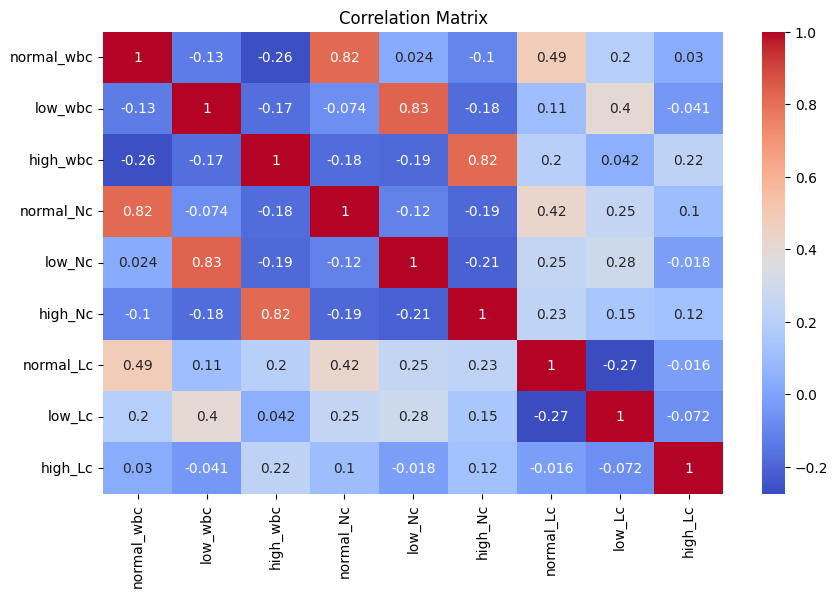

In [581]:
# Compute the correlation matrix
corr_matrix = imp_data2.loc[:, 'normal_wbc':'high_Lc'].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Some predictor variables tend to have correlation which can lead to multicollinearity.Feature selection methods will be applied to reduce the impact of correlated predictors.

# Test data

In [582]:
uploaded = files.upload()
import io

testdata_org = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (5).csv


## Test Data Preprocessing

In [583]:
testdata = testdata_org.copy()

In [584]:
testdata.head()

,ID,Year,Month,Hospital,Sample,ICU,OPD,Sex,Age,Ethnicity,...,FU_L.interrogansserovarIcterohaemorrhagiaestr.RGA,FU_L.interrogansserovarMankarsostr.Mankarso,FU_L.santarosaiserovarGeorgiastr.LT117,FU_L.santarosaiserovarPyrogenesstr.Salinem,FU_L.interrogansserovarBataviaestr.VanTienan,FU_L.interrogansserovarAlexistr.616,FU_L.interrogansserovarAustralisstr.Ballico,FU_L.interrogansserovarwolfiistr.3705,FU_L.interrogansserovarWeerasinghe,FU_Patoc
0,1,2017,6,1,1,2,2,1,49,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2017,6,1,1,2,2,1,47,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2017,6,1,1,2,2,1,51,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2017,6,1,1,2,2,2,37,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2017,6,1,1,2,1,1,99,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [585]:
col_names = {'Muscletendernessonset': 'Mustenderonset', 'Muscletendernessad':'Mustenderad', 'Vomitingadmission':'Vomitingad','Cnsuffusionad':'Consufad','Cnsuffusiononset':'Consufonset', 
             'Mucosalrashonset':'Mucorashonset','Mucosalrashad':'Mucorashad', 'Diarrhoeaonset':'diarrheaonset','Diarrhoeaad':'diarrheaad', 'OliguriaAd':'Oliguriaad', 'Haemoptasisonset':'Haemoptysisonset','Haemoptasisad':'Haemoptysisad', "SOBadd": 'SOBad' }
testdata.rename(columns = col_names, inplace=True)

In [586]:
colnames = ['Headache','Fever','Chills','Rigors','Musclepain','Mustender','Nausea','Vomiting','Consuf','Skinrash','Mucorash','Prostration','diarrhea','Oliguria','Anuria','Jaundice',
            'Photophobia','Confusion','Cough','Haemoptysis','SOB','Chestpain','Bleeding']
for col in colnames:
  df = testdata[[col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  testdata[col+'Days'] = df['Days']
  testdata.drop([col+'onset',col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [587]:
col_names = {'Hepatictendernessad':'hepatictenderad', 'Hepatomegalyad':'hepatomegalyad', 'Spleenimegalyad':'Spleenomegalyad', 'Lympadenopathyad':'Lymphadenopathyad'}
testdata.rename(columns = col_names, inplace=True)
colnames = ['hepatictender','hepatomegaly','Spleenomegaly','Lymphadenopathy', 'Neckstiffness']
for col in colnames:
  df = testdata[[col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad']]
  df = df.replace(99, np.nan)
  df['Days'] = None
  for index, row in df.iterrows():
    if df.loc[index].isna().all() == False:
     df.at[index, 'Days'] = df.loc[index].eq(1).sum()
    else:
     df.at[index, 'Days'] = np.nan
  testdata[col+'Days'] = df['Days']
  testdata.drop([col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10', col + 'ad'], axis=1, inplace=True)

In [588]:
testdata = testdata.drop(columns_to_drop_1, axis=1)

In [589]:
drop_cols = ['PRad','SBPadd','DBPadd','Pulserate2','Pulserate3','Pulserate4',
             'Pulserate5','Pulserate6','Pulserate7','Pulserate8','Pulserate9',
             'Pulserate10','SBP2','DBP2','SBP3','DBP3','SBP4','DBP4','SBP5',
             'DBP5','SBP6','DBP6','SBP7','DBP7','SBP8','DBP8','SBP9','DBP9',
             'SBP10','DBP10']
# Cannot distinguish between actual 99 values and na 99 values
testdata.drop(drop_cols, axis=1, inplace=True)

In [590]:
col = 'Platelet'
colnames = [col + 'count', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
platelet = testdata[colnames]
platelet = platelet.replace(99, np.nan)

# Apply the condition functions to each row
normal_platelet = platelet.apply(normal_plat, axis=1)
mildlow_platelet = platelet.apply(mildlow_plat, axis=1)
moderatelow_platelet = platelet.apply(moderatelow_plat, axis=1)
severelow_platelet = platelet.apply(severelow_plat, axis=1)

testdata['normal_platelet'] = normal_platelet
testdata['mildlow_platelet'] = mildlow_platelet
testdata['moderatelow_platelet'] = moderatelow_platelet
testdata['severelow_platelet'] = severelow_platelet

testdata.drop(colnames, axis = 1, inplace = True)


In [591]:
col = 'WBCcount'
colnames = ['WBCcount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
wbc = testdata[colnames]
wbc = wbc.replace(99, np.nan)

# Apply the condition functions to each row
normal_wbcc = wbc.apply(normal_wbc, axis=1)
low_wbcc = wbc.apply(low_wbc, axis=1)
high_wbcc = wbc.apply(high_wbc, axis=1)


testdata['normal_wbc'] = normal_wbcc
testdata['low_wbc'] = low_wbcc
testdata['high_wbc'] = high_wbcc


testdata.drop(colnames, axis = 1, inplace = True)

In [592]:
col = 'Ncount'
colnames = ['Ncount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Nc = testdata[colnames]
Nc = Nc.replace(99, np.nan)

# Apply the condition functions to each row
normal_NC = Nc.apply(normal_Nc, axis=1)
low_NC = Nc.apply(low_Nc, axis=1)
high_NC = Nc.apply(high_Nc, axis=1)


testdata['normal_Nc'] = normal_NC
testdata['low_Nc'] = low_NC
testdata['high_Nc'] = high_NC


testdata.drop(colnames, axis = 1, inplace = True)

In [593]:
col = 'Lcount'
colnames = ['Lcount', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Lc = testdata[colnames]
Lc = Lc.replace(99, np.nan)

normal_LC = Lc.apply(normal_Lc, axis=1)
low_LC = Lc.apply(low_Lc, axis=1)
high_LC = Lc.apply(high_Lc, axis=1)


testdata['normal_Lc'] = normal_LC
testdata['low_Lc'] = low_LC
testdata['high_Lc'] = high_LC

testdata.drop(colnames, axis = 1, inplace = True)

In [594]:
col = 'RBC'
colnames = ['RBC', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
rbc = testdata[colnames]
rbc = rbc.replace(99, np.nan)

normal_rbcc = rbc.apply(normal_rbc, axis=1)
low_rbcc = rbc.apply(low_rbc, axis=1)
high_rbcc = rbc.apply(high_rbc, axis=1)


testdata['normal_rbc'] = normal_rbcc
testdata['low_rbc'] = low_rbcc
testdata['high_rbc'] = high_rbcc

testdata.drop(colnames, axis = 1, inplace = True)

In [595]:
col = 'Puscells'
colnames = ['Puscells', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata.drop(colnames, axis = 1, inplace = True)

In [596]:
drop_cols = ['PulseRate','PulseRhythem','WBC_first_day','WBCCount1','ALP', 'Sphosphate', 'Samylase']

testdata.drop(drop_cols, axis=1, inplace=True)

In [597]:
col = 'Redcells'
colnames = ['Redcells', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
rc = testdata[colnames]

for col in colnames:
    rc[col] = pd.to_numeric(rc[col], errors='coerce')
    rc[col] = rc[col].astype('Int64')

rc = rc.replace(99, np.nan)


In [598]:
normal_rcc = rc.apply(normal_rc, axis=1)
low_rcc = rc.apply(low_rc, axis=1)
high_rcc = rc.apply(high_rc, axis=1)


testdata['normal_rc'] = normal_rcc
testdata['low_rc'] = low_rcc
testdata['high_rc'] = high_rcc

testdata.drop(colnames, axis = 1, inplace = True)

In [599]:
col = 'N'
colnames = ['N', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Np = testdata[colnames]
Np = Np.replace(99, np.nan)

normal_NP = Np.apply(normal_Np, axis=1)
low_NP = Np.apply(low_Np, axis=1)
high_NP = Np.apply(high_Np, axis=1)


testdata['normal_Np'] = normal_NP
testdata['low_Np'] = low_NP
testdata['high_Np'] = high_NP

testdata.drop(colnames, axis = 1, inplace = True)

In [600]:
col = 'L'
colnames = ['L', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Lp = testdata[colnames]
Lp = Lp.replace(99, np.nan)

normal_LP = Lp.apply(normal_Lp, axis=1)
low_LP = Lp.apply(low_Lp, axis=1)
high_LP = Lp.apply(high_Lp, axis=1)


testdata['normal_Lp'] = normal_LP
testdata['low_Lp'] = low_LP
testdata['high_Lp'] = high_LP

testdata.drop(colnames, axis = 1, inplace = True)

In [601]:
col = 'PCV'
colnames = ['PCV', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
pcv = testdata[colnames]
pcv = pcv.replace(99, np.nan)

normal_pcvp = pcv.apply(normal_pcv, axis=1)
low_pcvp = pcv.apply(low_pcv, axis=1)
high_pcvp = pcv.apply(high_pcv, axis=1)


testdata['normal_pcv'] = normal_pcvp
testdata['low_pcv'] = low_pcvp
testdata['high_pcv'] = high_pcvp

testdata.drop(colnames, axis = 1, inplace = True)

In [602]:
col = 'CRP'
colnames = ['CRP', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
crp = testdata[colnames]
crp = crp.replace(99, np.nan)

normal_crpp = crp.apply(normal_crp, axis=1)
moderate_crpp = crp.apply(moderate_crp, axis=1)
marked_crpp = crp.apply(marked_crp, axis=1)
severe_crpp = crp.apply(severe_crp, axis=1)

testdata['normal_crp'] = normal_crpp
testdata['moderate_crp'] = moderate_crpp
testdata['marked_crp'] = marked_crpp
testdata['severe_crp'] = severe_crpp

testdata.drop(colnames, axis = 1, inplace = True)

In [603]:
# ESR can take 99 so it cannot be distinguished between acutal 99 and na
col = 'ESR'
colnames = ['ESR', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata.drop(colnames, axis = 1, inplace = True)

In [604]:
# Too many missing values
testdata.drop(['Granularcast', 'Leucocytes'], axis = 1, inplace = True)

In [605]:
col = 'Albumin'
colnames = ['Albumin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
alb = testdata[colnames]
alb = alb.replace(99, np.nan)

nill_albc = alb.apply(nill_alb, axis=1)
occ_albc = alb.apply(occ_alb, axis=1)
plus_albc = alb.apply(plus_alb, axis=1)


testdata['nill_alb'] = nill_albc
testdata['occ_alb'] = occ_albc
testdata['plus_alb'] = plus_albc

testdata.drop(colnames, axis = 1, inplace = True)

In [606]:
col = 'Na'
colnames = ['Na', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
Na = testdata[colnames]
Na = Na.replace(99, np.nan)

normal_Nap = Na.apply(normal_Na, axis=1)
low_Nap = Na.apply(low_Na, axis=1)
high_Nap = Na.apply(high_Na, axis=1)


testdata['normal_Na'] = normal_Nap
testdata['low_Na'] = low_Nap
testdata['high_Na'] = high_Nap

testdata.drop(colnames, axis = 1, inplace = True)

In [607]:
col = 'K'
colnames = ['K', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
K = testdata[colnames]
K = K.replace(99, np.nan)

normal_Kp = K.apply(normal_K, axis=1)
low_Kp = K.apply(low_K, axis=1)
high_Kp = K.apply(high_K, axis=1)


testdata['normal_K'] = normal_Kp
testdata['low_K'] = low_Kp
testdata['high_K'] = high_Kp

testdata.drop(colnames, axis = 1, inplace = True)

In [608]:
col = 'AST'
colnames = ['AST', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
AST = testdata[colnames]
AST = AST.replace(99, np.nan)

normal_ASTp = AST.apply(normal_AST, axis=1)
low_ASTp = AST.apply(low_AST, axis=1)
high_ASTp = AST.apply(high_AST, axis=1)


testdata['normal_AST'] = normal_ASTp
testdata['low_AST'] = low_ASTp
testdata['high_AST'] = high_ASTp

testdata.drop(colnames, axis = 1, inplace = True)

In [609]:
# ALT can take 99 so it cannot be distinguished between acutal 99 and na
col = 'ALT'
colnames = ['ALT', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata.drop(colnames, axis = 1, inplace = True)

In [610]:
col = 'T.Bilirub'
colnames = ['T.Bilirubin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
TBil = testdata[colnames]
TBil = TBil.replace(99, np.nan)

normal_TBilp = TBil.apply(normal_TBil, axis=1)
high_TBilp = TBil.apply(high_TBil, axis=1)


testdata['normal_TBil'] = normal_TBilp
testdata['high_TBil'] = high_TBilp

testdata.drop(colnames, axis = 1, inplace = True)

In [611]:
col = 'D.Bilirub'
colnames = ['D.Bilirubin', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
DBil = testdata[colnames]
DBil = DBil.replace(99, np.nan)

normal_DBilp = DBil.apply(normal_DBil, axis=1)
high_DBilp = DBil.apply(high_DBil, axis=1)


testdata['normal_DBil'] = normal_DBilp
testdata['high_DBil'] = high_DBilp

testdata.drop(colnames, axis = 1, inplace = True)

In [612]:
col = 'B.Urea'
colnames = ['B.urea', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata[colnames] = testdata[colnames].where(testdata[colnames] < 99, np.nan)


In [613]:
BUrea = testdata[colnames]

normal_BUreap = BUrea.apply(normal_BUrea, axis=1)
low_BUreap = BUrea.apply(low_BUrea, axis=1)
high_BUreap = BUrea.apply(high_BUrea, axis=1)

testdata['normal_BUrea'] = normal_BUreap
testdata['low_BUrea'] = low_BUreap
testdata['high_BUrea'] = high_BUreap

testdata.drop(colnames, axis = 1, inplace = True)

In [614]:
# ESR can take 99 so it cannot be distinguished between acutal 99 and na
col = 'GT'
colnames = ['X.GT', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata.drop(colnames, axis = 1, inplace = True)

# S.Cr
col = 'S.Cr'
colnames = ['S.creatinine', col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
testdata.drop(colnames, axis = 1, inplace = True)

In [615]:
cols = ['S.amylase', 'S.phosphate','ALP']
for col in cols:
  colname = [col + '2',col + '3',col + '4',col + '5',col + '6',col + '7',col + '8',col + '9',col + '10']
  testdata.drop(colname, axis = 1, inplace = True)


In [616]:
testdata = testdata.drop('ID', axis=1)
testdata = testdata.replace(99, np.nan)

In [617]:
cols = ['HomeStreamrivercanaloranyotherrunningwatersource', 
        'WorkplaceStreamrivercanaloranyotherrunningwatersource',
        'Homepondlaketankoranyotherstagnantwatersource',
        'WorkPlacepondlaketankoranyotherstagnantwatersource']
       
anyWaterArea = testdata[cols]

testdata['anyWaterArea'] = anyWaterArea.apply(water_area, axis=1)

testdata.drop(cols, axis = 1, inplace = True)


In [618]:
lowercase_testdata = testdata.copy()
lowercase_testdata.columns = lowercase_testdata.columns.str.lower()

for col in animal:
  testdata[col] = lowercase_testdata[col + 'home'] + lowercase_testdata[col + 'workplace'] + lowercase_testdata[col + 'neighbourhood']
  
testdata.drop(['Rathome','RatWorkplace','RatNeighbourhood','Cathome','Catworkplace',
           'CatNeighbourhood','Doghome','DogWorkplace','DogNeighbourhood',
           'Cattlehome','CattleWorkplace','CattleNeighbourhood','PigHome',
           'PigWorkplace','PigNeighbourhood','GoatHome','GoatWorkplace','GoatNeighbourhood','OtherHome',
           'OtherWorkplace','OtherNeighbourhood'], axis = 1, inplace = True)


In [619]:
testdata = testdata.rename(columns={'Workplacemarshywet':'Workplacemarshywetland', 'HomeBushes':'Homebushes', 'WorkPlaceworkingpaddyfield':'Workplaceworkingpaddyfield',
                            'workplaceotheragricultural':'Workplaceotheragricultural'})

cols = ['marshywetland','bushes','forest','workingpaddyfield','abondantpaddyfield',
        'otheragricultural','animalfarm','garbageaccumilation','blockeddrainage','sewer']

for col in cols:
  df = testdata[['Home' + col, 'Workplace' + col]]
  testdata['any' + col] = df.apply(outcome, axis=1)
  testdata.drop(['Home' + col, 'Workplace' + col], axis = 1, inplace = True)

In [620]:
testdata['urumeeya'] = testdata['Urumeeyahome'] + testdata['Urumeeyaworkplace'] + testdata['UrimeeyaNeighbourhood']
testdata['otherRhodents'] = testdata['OtherrhodentsHome'] + testdata['OtherRhoddentsWorkplace'] + testdata['OtherRhodentsNeighbourhood']

testdata.drop(['UrimeeyaNeighbourhood','Urumeeyahome','Urumeeyaworkplace', 'OtherrhodentsHome', 'OtherRhoddentsWorkplace', 'OtherRhodentsNeighbourhood'], axis = 1, inplace=True)

In [621]:
# Diagnosis
cols = ['WPqPCRDiagnosis','UrineqPCRDiagnosis','CultureqPCRDia','SerumqPCRDiagnosis','UFqPCRDiag']

testdata['confirmed_diag'] = testdata[cols].eq(1).sum(axis=1)
testdata['probable_diag'] = testdata[cols].eq(2).sum(axis=1)
testdata['notdetected_diag'] = testdata[cols].eq(3).sum(axis=1)

testdata.drop(['UrineqPCRDiagnosis','CultureqPCRDia','SerumqPCRDiagnosis','UFqPCRDiag'], axis = 1, inplace = True)

In [622]:
testdata['Isolate'] = testdata['Isolate'].replace(98, np.nan)

In [623]:
testdata = testdata.drop(columns_to_drop_2, axis=1)

In [624]:
testdata.shape

(347, 81)

In [625]:
cat_columns_to_convert = ['Year','Month','ICU','OPD','Sex','Hospital', 'Sample',
                          'Ethnicity','Education','TertiaryEducation','Prophylactics',
                          'Pasttreatments','Pastantibiotics','Chronicillness',
                          'Possibleexposure','Psychoticsymptomsonset','Psychoticsymptomsad',
                          'WPqPCRDiagnosis','Isolate','MAT_set_1']

testdata[cat_columns_to_convert] = testdata[cat_columns_to_convert].astype('Int64')
testdata[cat_columns_to_convert] = testdata[cat_columns_to_convert].astype('category')

num_columns_to_convert  = testdata.columns[testdata.columns.get_loc('HeadacheDays'):]

testdata[num_columns_to_convert] = testdata[num_columns_to_convert].astype('Int64')

In [626]:
imp_testdata2 = testdata.copy()

categorical_columns = testdata.select_dtypes(include='category').columns.tolist()

testdata2_imputed = imp_testdata2[categorical_columns].fillna(imp_testdata2[categorical_columns].mode().iloc[0])

# Update the original testdataframe with the imputed values
imp_testdata2[categorical_columns] = testdata2_imputed

from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the 'income' column and transform the testdata
imp_testdata2['Income'] = imputer.fit_transform(imp_testdata2[['Income']])

imputer = KNNImputer(n_neighbors=5)

# Fit the imputer on the testdata and transform the 'age' column
imp_testdata2['Age'] = imputer.fit_transform(imp_testdata2[['Age']])
# Round the imputed values to the nearest integer
imp_testdata2['Age'] = imp_testdata2['Age'].round().astype(int)

columns = imp_testdata2.columns.tolist()

# Find the index of the 'column_x'
index = columns.index('HeadacheDays')

missing_columns = columns[index:]

testdata_imputed = imp_testdata2[missing_columns].fillna(imp_testdata2[missing_columns].mode().iloc[0])

# Update the original testdataFrame with the imputed values
imp_testdata2[missing_columns] = testdata_imputed
imp_testdata2['WPqPCRDiagnosis'] = imp_testdata2['WPqPCRDiagnosis'].map({1: 'Confirmed', 2: 'Probable', 3: 'Not Detected'})
test_df = imp_testdata2.drop(['MAT_set_1', 'Hospital', 'Sample'], axis = 1)

# Model Fitting 


In [627]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = imp_data2.drop(['Final', 'MAT_set_1', 'Hospital', 'Sample'], axis = 1)
y = imp_data2['Final']

categorical_cols = X.select_dtypes(include='category').columns.tolist()
numeric_cols = X.select_dtypes(include=['Int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

# Logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit the model
model.fit(X, y_encoded)

# Evaluate the model
accuracy = model.score(X, y_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9301470588235294


In [628]:
y_testpred = model.predict(test_df)

In [629]:
actual_ytp = y_testpred + 1

In [630]:
print(actual_ytp)

[1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 1 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 1
 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2 2 1 2
 2 1 2 2 2 1 1 2 2 2 2 1 1 2 2 1 2 1 1 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 1 2 1
 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 2
 1 2 2 1 2 2 2 2 2 1 2 2 1 2]


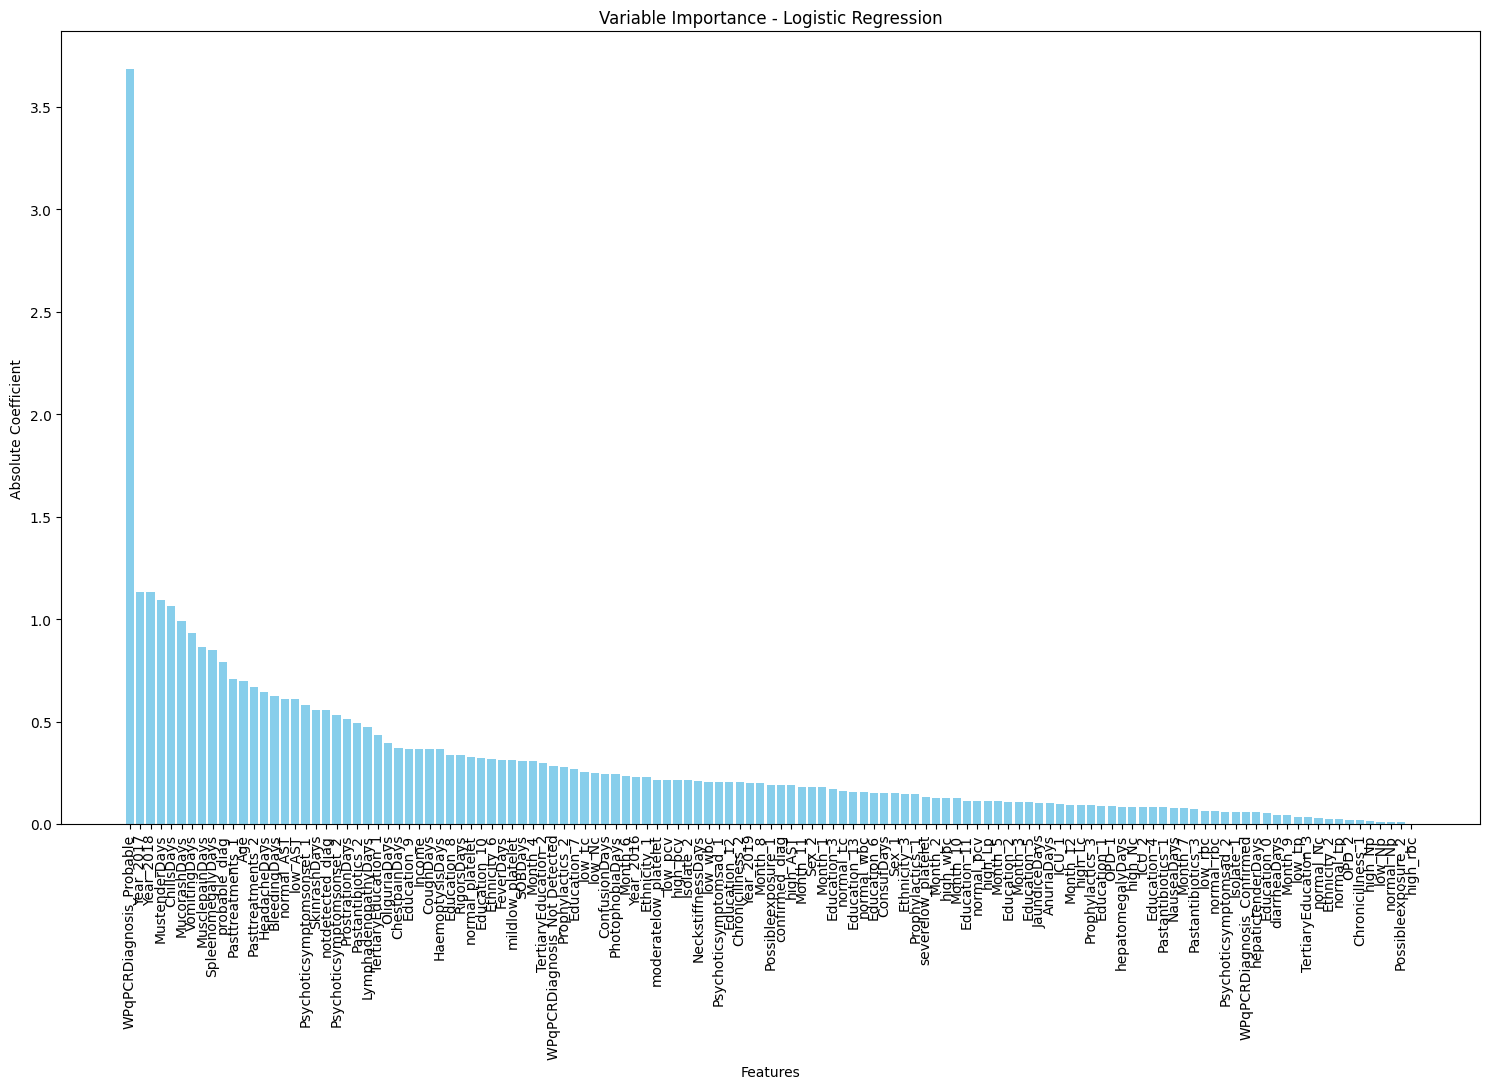

In [634]:
import matplotlib.pyplot as plt
mod = model.named_steps['classifier']
coef_abs = np.abs(mod.coef_[0])
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out().tolist() \
               + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()

# Sort the feature importance in descending order
sorted_indices = np.argsort(coef_abs)[::-1]
sorted_coef_abs = coef_abs[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Create the variable importance graph
plt.figure(figsize=(15, 11))
plt.bar(range(len(sorted_coef_abs)), sorted_coef_abs, align='center', color='skyblue')
plt.xticks(range(len(sorted_coef_abs)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient')
plt.title('Variable Importance - Logistic Regression')
plt.tight_layout()
plt.show()

In [635]:
X_preprocessed = model.named_steps['preprocessor'].transform(X)
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)
selected_indices = np.where(sorted_coef_abs > 0.4)[0]
selected_feature_names = sorted_feature_names[selected_indices]
X_selected = X_preprocessed_df[selected_feature_names]
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_selected, y_encoded)
accuracy = model2.score(X_selected, y_encoded)
print("Accuracy:", accuracy)

Accuracy: 0.9237132352941176


In [636]:
selected_feature_names 

array(['WPqPCRDiagnosis_Probable', 'Year_2017', 'Year_2018',
       'MustenderDays', 'ChillsDays', 'MucorashDays', 'VomitingDays',
       'MusclepainDays', 'SpleenomegalyDays', 'probable_diag',
       'Pasttreatments_1', 'Age', 'Pasttreatments_2', 'HeadacheDays',
       'BleedingDays', 'normal_AST', 'low_AST',
       'Psychoticsymptomsonset_1', 'SkinrashDays', 'notdetected_diag',
       'Psychoticsymptomsonset_2', 'ProstrationDays', 'Pastantibiotics_2',
       'LymphadenopathyDays', 'TertiaryEducation_1'], dtype='<U28')

In [637]:
Xtest_preprocessed = preprocessor.transform(test_df)
Xtest_preprocessed_df = pd.DataFrame(Xtest_preprocessed, columns=feature_names)
Xtest_selected = Xtest_preprocessed_df[selected_feature_names]
y_testpred_selected = model2.predict(Xtest_selected)
y_testpred_selected += 1

In [638]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_testpred_selected, actual_ytp)
print("Accuracy:", accuracy)

Accuracy: 0.9884726224783862
